In [1]:
import numpy as np
import pandas as pd
import keras

In [2]:
#Read the text file as separate lines of text
with open('shakespeare.txt', 'r') as file:
    text = file.read()
    lines = text.lower().split('\n')
#Define words, vocabulary size and sequences of words as lines
from tensorflow.keras.preprocessing.text import text_to_word_sequence, Tokenizer
words = text_to_word_sequence(text)
tokenizer = Tokenizer()
tokenizer.fit_on_texts(words)
vocabulary_size = len(tokenizer.word_index) + 1
sequences = tokenizer.texts_to_sequences(lines)
#Find subsequences 
subsequences = []
for sequence in sequences:
    for i in range(1, len(sequence)):
       subsequence = sequence[:i+1]
       subsequences.append(subsequence)
            

In [3]:
subsequences

[[26, 189],
 [26, 189, 190],
 [26, 189, 190, 191],
 [26, 189, 190, 191, 97],
 [26, 189, 190, 191, 97, 98],
 [6, 99],
 [6, 99, 27],
 [6, 99, 27, 192],
 [6, 99, 27, 192, 100],
 [6, 99, 27, 192, 100, 101],
 [6, 99, 27, 192, 100, 101, 43],
 [18, 34],
 [18, 34, 2],
 [18, 34, 2, 193],
 [18, 34, 2, 193, 57],
 [18, 34, 2, 193, 57, 35],
 [18, 34, 2, 193, 57, 35, 36],
 [18, 34, 2, 193, 57, 35, 36, 194],
 [14, 102],
 [14, 102, 103],
 [14, 102, 103, 100],
 [14, 102, 103, 100, 104],
 [14, 102, 103, 100, 104, 14],
 [14, 102, 103, 100, 104, 14, 195],
 [18, 1],
 [18, 1, 196],
 [18, 1, 196, 5],
 [18, 1, 196, 5, 15],
 [18, 1, 196, 5, 15, 66],
 [18, 1, 196, 5, 15, 66, 197],
 [18, 1, 196, 5, 15, 66, 197, 58],
 [198, 3],
 [198, 3, 199],
 [198, 3, 199, 200],
 [198, 3, 199, 200, 12],
 [198, 3, 199, 200, 12, 10],
 [198, 3, 199, 200, 12, 10, 201],
 [198, 3, 199, 200, 12, 10, 201, 202],
 [203, 28],
 [203, 28, 204],
 [203, 28, 204, 37],
 [203, 28, 204, 37, 205],
 [203, 28, 204, 37, 205, 105],
 [3, 10],
 [3, 10, 

In [4]:
from keras.preprocessing.sequence import pad_sequences
sequence_length = max([len(sequence) for sequence in sequences])
sequences = pad_sequences(subsequences, maxlen=sequence_length, padding='pre')

In [5]:
sequences.shape

(1177, 10)

In [6]:
from keras.utils import to_categorical
X, y = sequences[:,:-1],sequences[:,-1]
y = to_categorical(y, num_classes=vocabulary_size)

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True, random_state=0)

In [11]:
vocabulary_size

581

In [8]:
X_train.shape

(1118, 9)

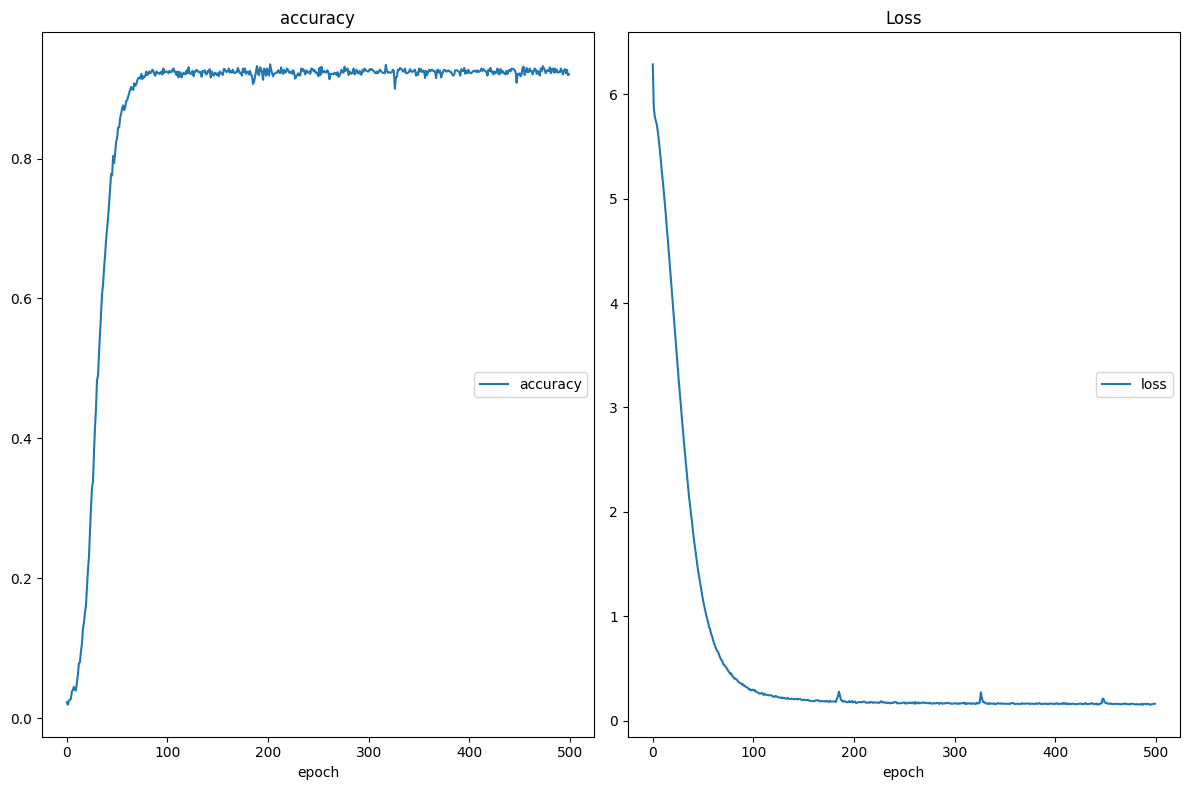

accuracy
	accuracy         	 (min:    0.020, max:    0.935, cur:    0.920)
Loss
	loss             	 (min:    0.152, max:    6.286, cur:    0.161)
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9312 - loss: 0.1331


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from livelossplot import PlotLossesKeras


model = Sequential()

model.add(Embedding(input_dim=vocabulary_size, output_dim=100,
                    input_shape = (sequence_length - 1,)))
model.add(LSTM(units=100, activation='tanh'))
model.add(Dropout(rate=0.1))
model.add(Dense(units=vocabulary_size, activation='softmax'))

callbacks = [
    #keras.callbacks.EarlyStopping(
        #monitor='val_loss',
        #min_delta=0.0001,
        #patience=100,
        #verbose=1,
        #mode='auto'
    #),
    PlotLossesKeras()
]

optimizer = Adam(learning_rate=0.001)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X, y, epochs=500, 
          #validation_data =(X_test,y_test),
          callbacks=[PlotLossesKeras(),callbacks])

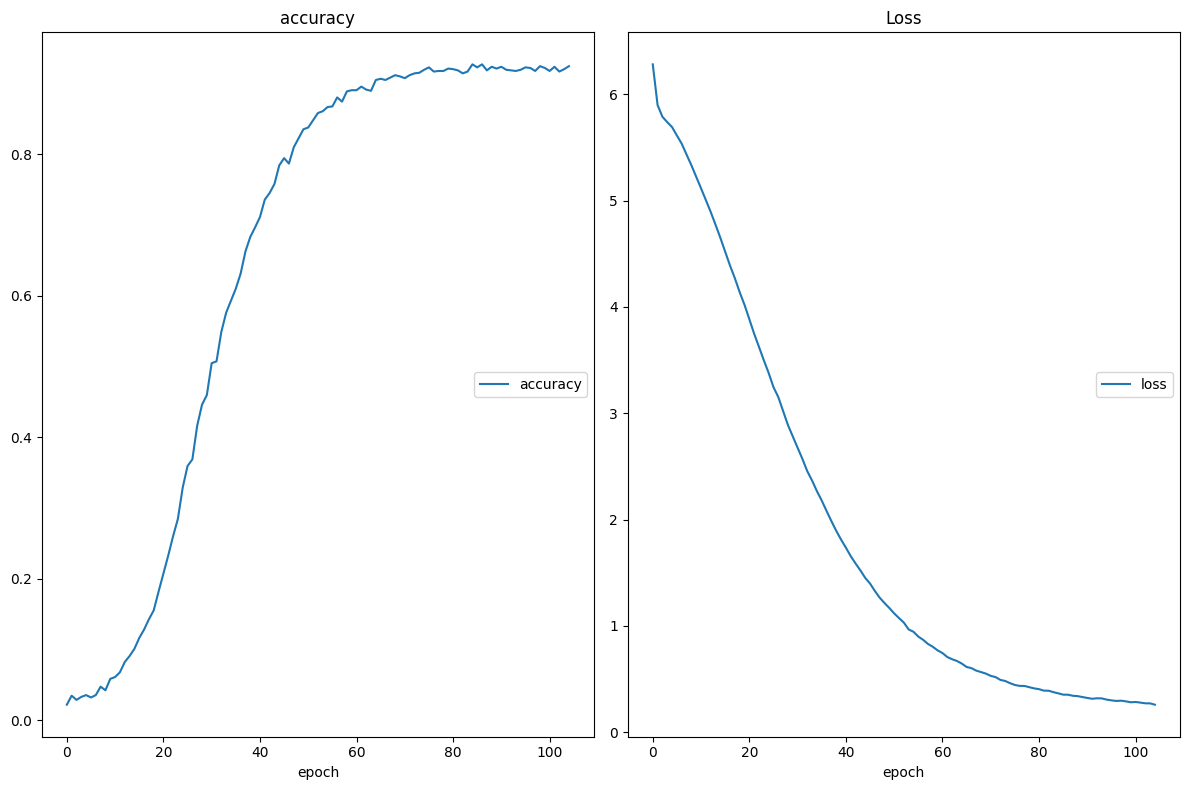

accuracy
	accuracy         	 (min:    0.022, max:    0.927, cur:    0.924)
Loss
	loss             	 (min:    0.260, max:    6.282, cur:    0.260)
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9298 - loss: 0.2460
Epoch 105: early stopping


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from livelossplot import PlotLossesKeras


model = Sequential()

model.add(Embedding(input_dim=vocabulary_size, output_dim=100,
                    input_shape = (sequence_length - 1,)))
model.add(LSTM(units=100, activation='tanh'))
model.add(Dropout(rate=0.1))
model.add(Dense(units=vocabulary_size, activation='softmax'))

callbacks = [
    keras.callbacks.EarlyStopping(
        monitor='accuracy',
        min_delta=0.0001,
        patience=20,
        verbose=1,
        mode='auto'
    ),
    PlotLossesKeras()
]

optimizer = Adam(learning_rate=0.001)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X, y, epochs=500, 
          #validation_data =(X_test,y_test),
          callbacks=[PlotLossesKeras(),callbacks])

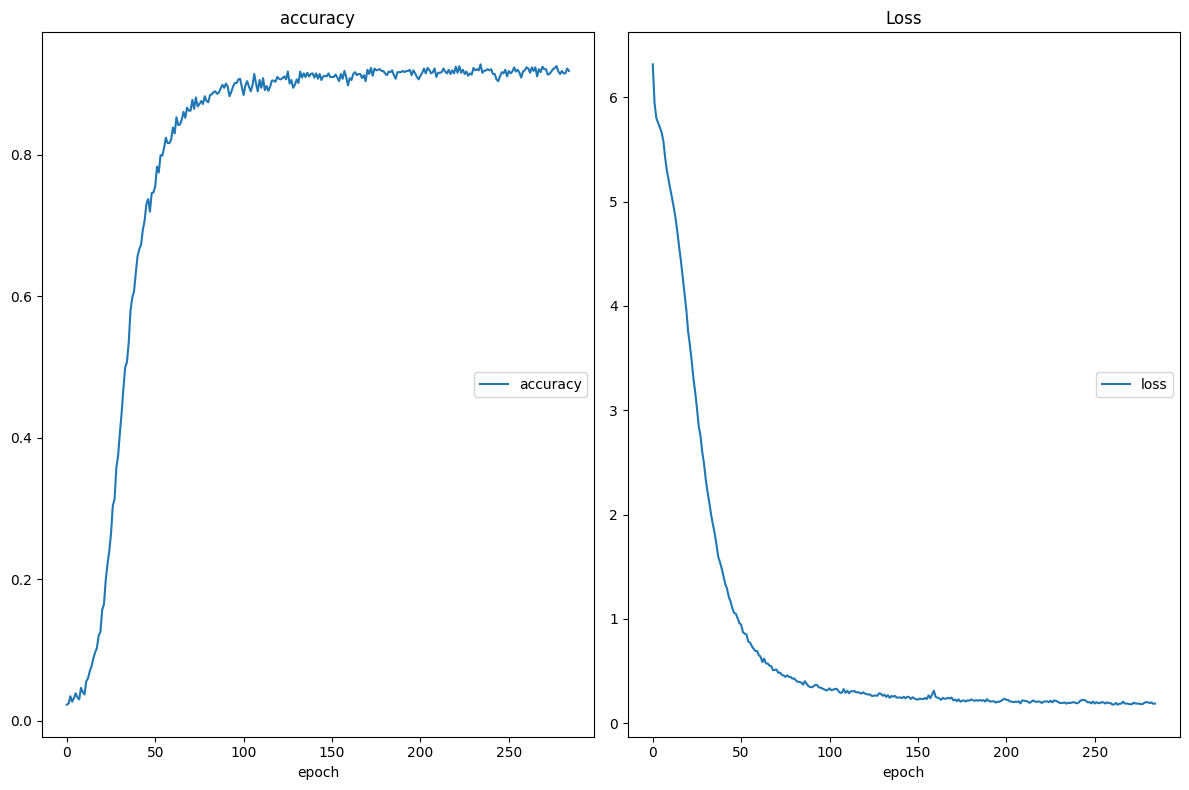

accuracy
	accuracy         	 (min:    0.023, max:    0.928, cur:    0.918)
Loss
	loss             	 (min:    0.176, max:    6.317, cur:    0.187)
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9173 - loss: 0.2022
Epoch 285: early stopping


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from livelossplot import PlotLossesKeras


model = Sequential()

model.add(Embedding(input_dim=vocabulary_size, output_dim=100,
                    input_shape = (sequence_length - 1,)))
model.add(LSTM(units=100, activation='tanh'))
model.add(Dropout(rate=0.1))
model.add(Dense(units=70, activation='relu'))
model.add(Dropout(rate=0.1))
model.add(Dense(units=vocabulary_size, activation='softmax'))

callbacks = [
    keras.callbacks.EarlyStopping(
        monitor='accuracy',
        min_delta=0.0001,
        patience=50,
        verbose=1,
        mode='auto'
    ),
    PlotLossesKeras()
]

optimizer = Adam(learning_rate=0.001)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X, y, 
          #batch_size=64, 
          epochs=500, 
          #validation_data =(X_test,y_test),
          callbacks=[PlotLossesKeras(),callbacks])